In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [22]:
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")

In [23]:
print("Train Shape:", train.shape)
print("Features Shape:", features.shape)

train.head()


Train Shape: (421570, 5)
Features Shape: (8190, 12)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [24]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [25]:
df = pd.merge(train, features, on=["Store", "Date"], how="left")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [26]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [27]:
markdown_cols = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]
for col in markdown_cols:
    df[col] = df[col].fillna(0)
df.head()    

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [28]:
df.isnull().sum()


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

In [29]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week

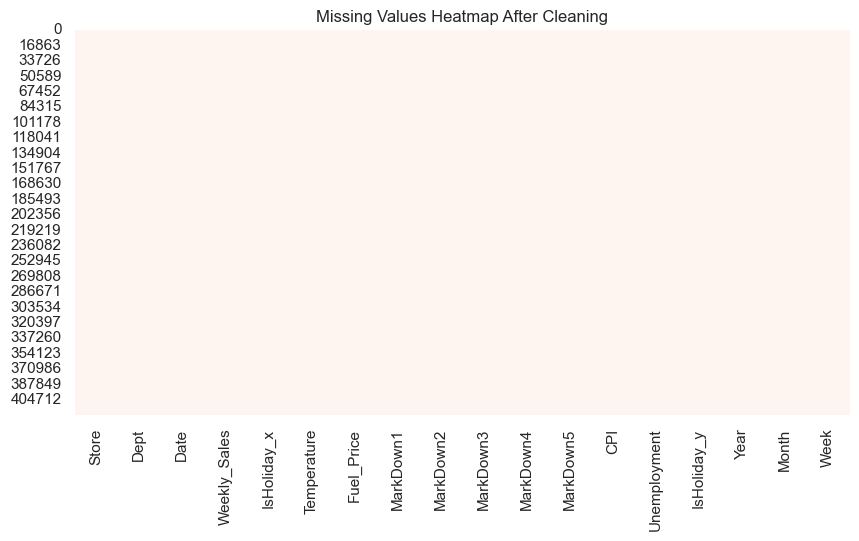

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap After Cleaning")
plt.show()

In [31]:
df = df.drop(columns=["IsHoliday_y"])
df = df.rename(columns={"IsHoliday_x": "IsHoliday"})

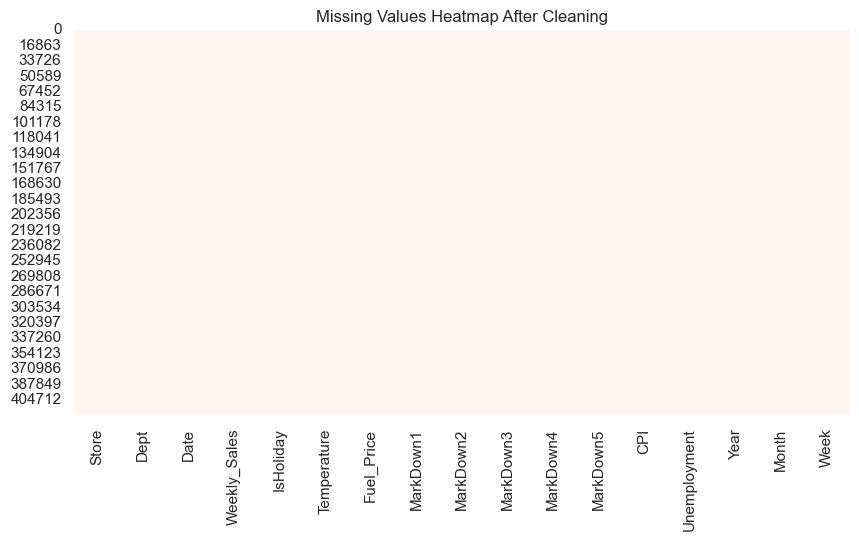

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap After Cleaning")
plt.show()

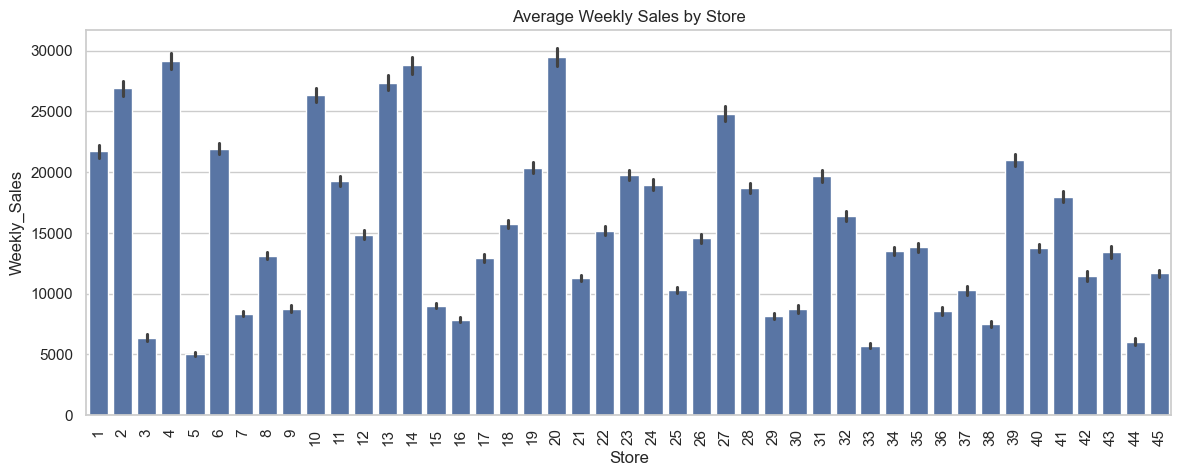

In [33]:
plt.figure(figsize=(14,5))
sns.barplot(data=df, x="Store", y="Weekly_Sales", estimator=np.mean)
plt.title("Average Weekly Sales by Store")
plt.xticks(rotation=90)
plt.show()

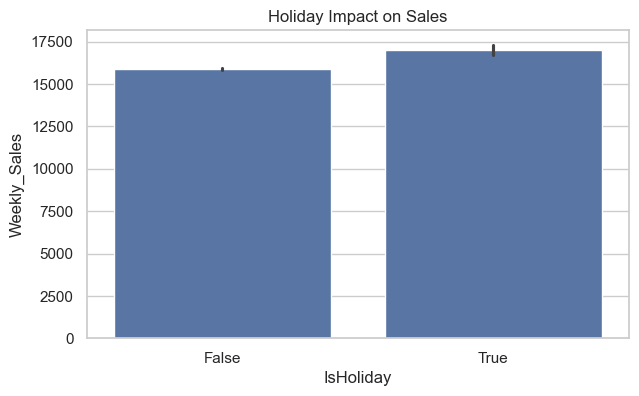

In [34]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x="IsHoliday", y="Weekly_Sales", estimator=np.mean)
plt.title("Holiday Impact on Sales")
plt.show()

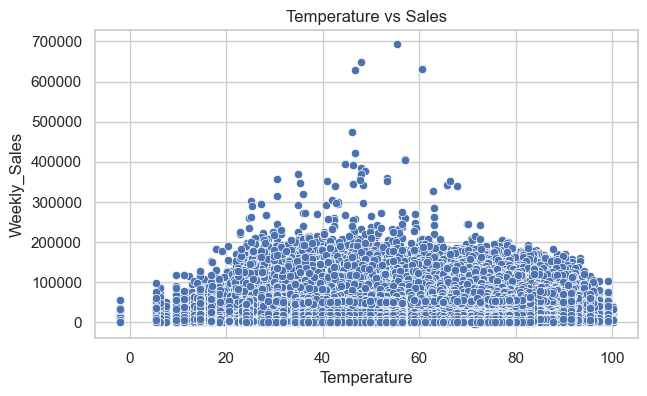

In [35]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x="Temperature", y="Weekly_Sales")
plt.title("Temperature vs Sales")
plt.show()

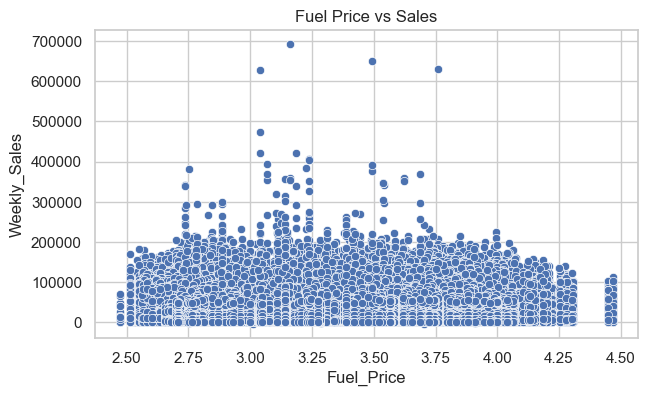

In [36]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x="Fuel_Price", y="Weekly_Sales")
plt.title("Fuel Price vs Sales")
plt.show()

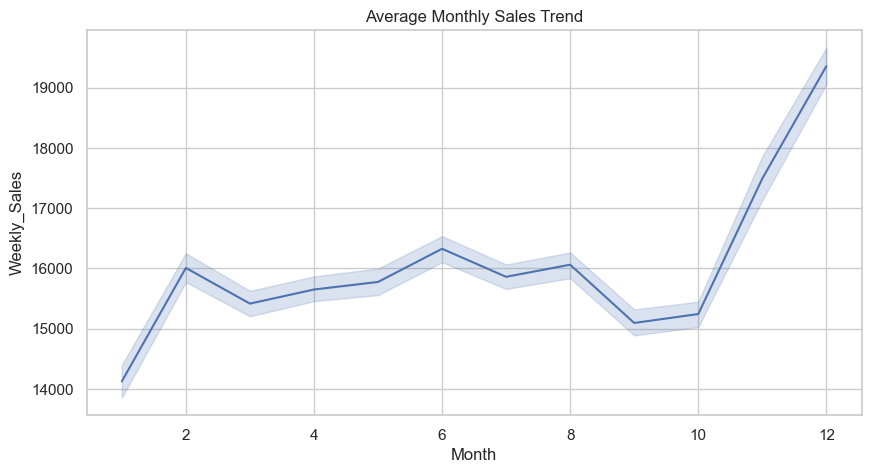

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Month", y="Weekly_Sales", estimator=np.mean)
plt.title("Average Monthly Sales Trend")
plt.show()

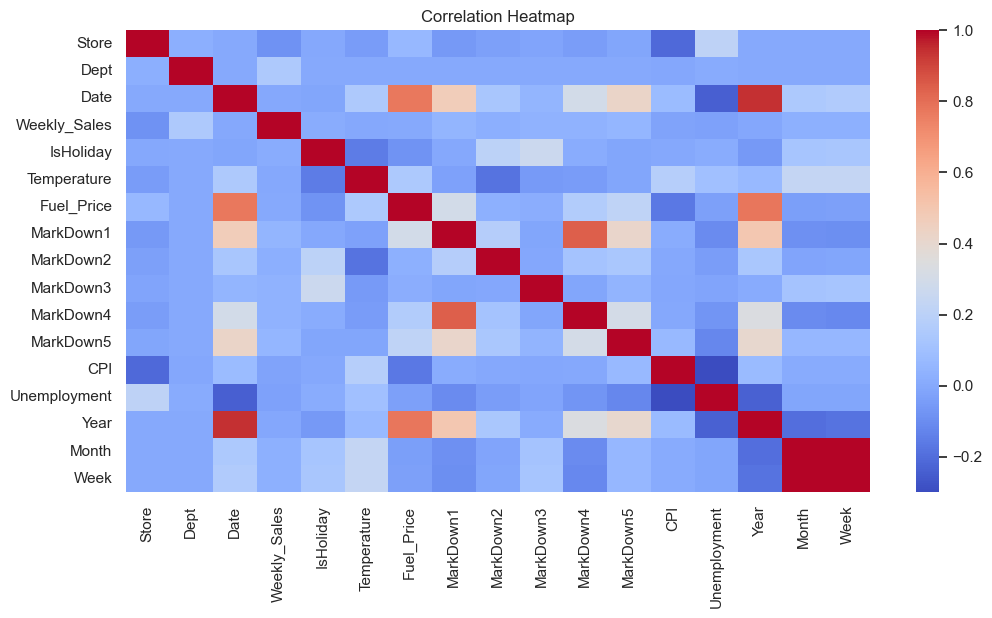

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

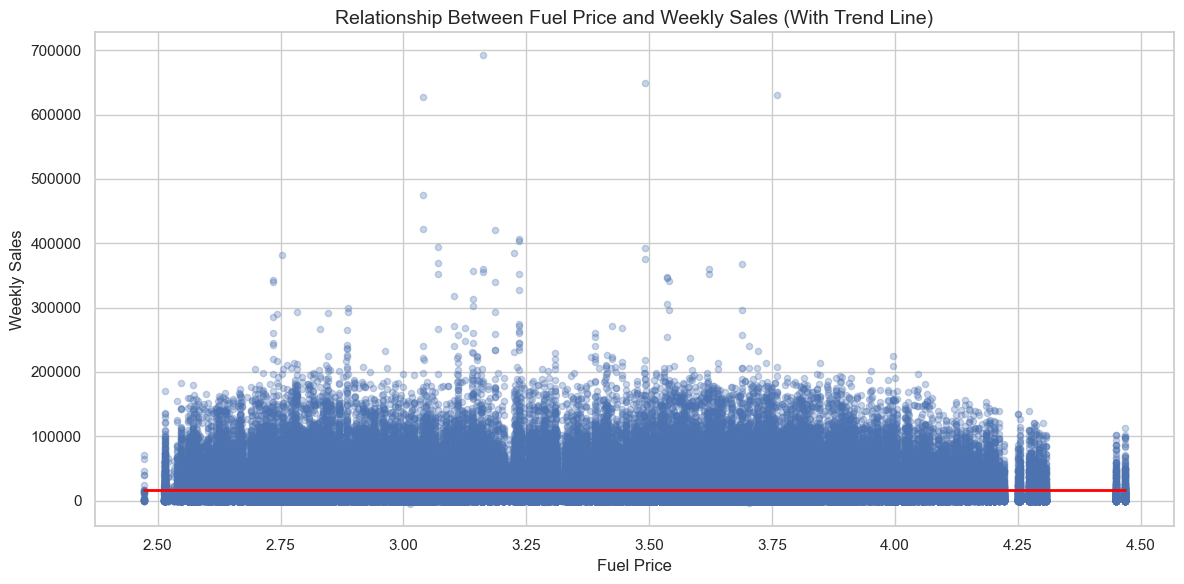

In [39]:
plt.figure(figsize=(12,6))

sns.regplot(
    x=df['Fuel_Price'], 
    y=df['Weekly_Sales'], 
    scatter_kws={'alpha':0.3, 's':20},
    line_kws={'color':'red', 'linewidth':2}
)

plt.title("Relationship Between Fuel Price and Weekly Sales (With Trend Line)", fontsize=14)
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()
